<a href="https://colab.research.google.com/github/tanyasosa/SeriesDeTiempo_TSC_A01177961/blob/main/Copy_of_series1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## Tanya Sosa Cavazos A01177961
### Sesión 6 -03 marzo 2023


In [1]:
# importamos las librerias de siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [4]:
# importamos datos
procesos = pd.read_csv("https://raw.githubusercontent.com/jaime-escobedo-tec/SeriesDeTiempo-Tec/main/procesos.csv")

In [5]:
procesos.head()

,ruido_blanco,caminata_aleatoria
0,0.000000,0.000000
1,0.706032,0.706032
2,1.915985,2.622017
3,-2.141755,0.480261
4,0.719057,1.199318


Graficamos el proceso de Ruido blanco

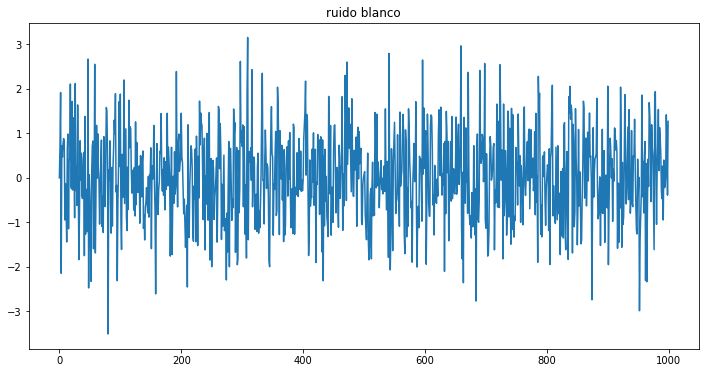

In [6]:
# figsize=( 12,6)
procesos['ruido_blanco'].plot()
plt.title('ruido blanco')
plt.show()

**El ruido blanco es estacionario**

Graficamos la caminata aleatoria pura

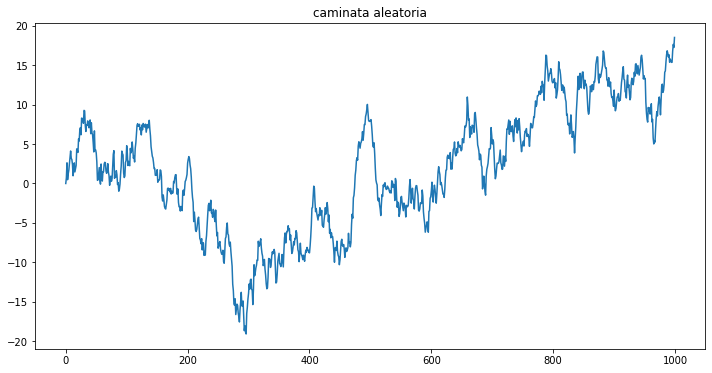

In [7]:
procesos['caminata_aleatoria'].plot()
plt.title('caminata aleatoria')
plt.show()

La caminata aleatiora no es estacionaria. El precio de las acciones, el tipo de cambio, la inflacion, entre otros son caminatas aleatorias.

El prónostico de la serie lo vamos a realizar en varios pasos:
1. Graficar la serie
2. Realizar la prueba de raices unitarias para verificar que el proceso sea estacionario
3. Si el proceso no es estacionario, lo hacemos estacionario. Si ya es estacionario procedemos al siguiente paso
4. Identificar qué tipo de proceso estacionario es
5. Identificado el proceso, realizar el pronóstico de la serie

como ejemplo utilizaremos la inflación de Estados Unidos 

In [8]:
# importamos la base de datos
inflacion_usa = pd.read_csv('https://raw.githubusercontent.com/jaime-escobedo-tec/SeriesDeTiempo-Tec/main/inflaci%C3%B3nUSA1.csv', index_col = 'mes', parse_dates=True)

In [9]:
# vemos el dataframe
inflacion_usa.tail()

,inflacion_usa
mes,
sep-22,8.20167
oct-22,7.70000
nov-22,7.10000
dic-22,6.50000
ene-23,6.40000


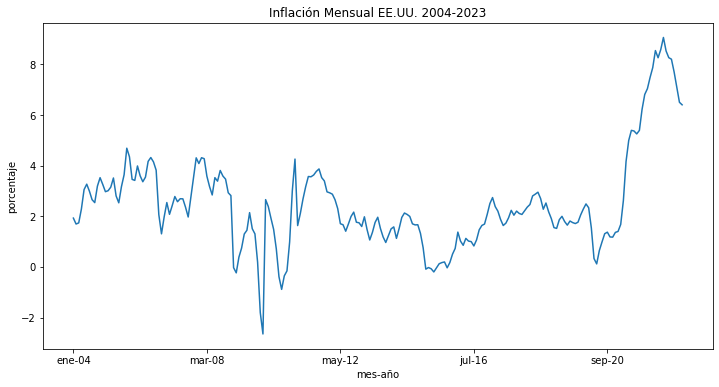

In [10]:
# comenzamos graficando la serie
# titulo y nombre a ejes
inflacion_usa['inflacion_usa'].plot();
plt.ylabel('porcentaje')
plt.xlabel('mes-año')
plt.title('Inflación Mensual EE.UU. 2004-2023')
plt.show()

In [11]:
## vamos a verificar que la serie sea estacionaria
## Dickey Fuller Aumentada (Aumented Dickey fuller)
result_adf = adfuller(inflacion_usa)
print('p-value: %.2f' % result_adf[1])

p-value: 0.18


Recuerde que

 **$H_0:$ serie No estacionaria**

 **$H_a:$ serie estacionaria**

regla de decisión si el p-valor$< \alpha $ entonces rechazar $H_0$

con un $\alpha=0.05$

conclusión: 0.18>0.05, No rechazamos H0, la serie es no estacionaria





**¿Cómo diferenciar una serie?**

In [12]:
# diferenciar serie
inflacion_usa['inflacion_diff'] = inflacion_usa['inflacion_usa'].diff()

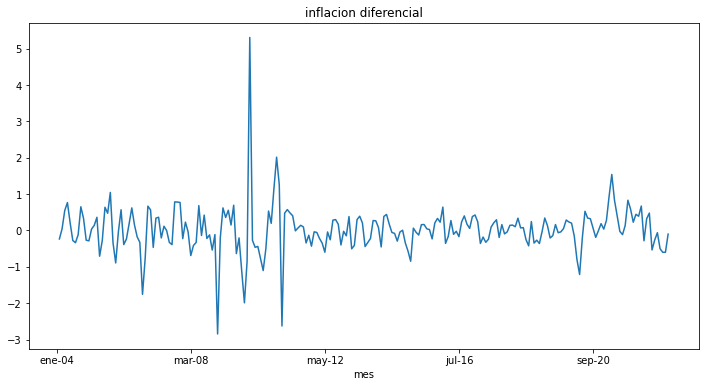

In [13]:
# graficamos esta nueva serie
inflacion_usa['inflacion_diff'].plot()
plt.title('inflacion diferencial')
plt.show()


Para determinar que tipo de proceso es recurriremos:

* Funcion de autocorrelación ACF
* Funcion de autocorrelación Parcial PACF

In [16]:
inflacion_usa

,inflacion_usa,inflacion_diff
mes,,
ene-04,1.926252,NaN
feb-04,1.693064,-0.233188
mar-04,1.737242,0.044178
abr-04,2.285092,0.547850
may-04,3.051771,0.766679
...,...,...
sep-22,8.201670,-0.061023
oct-22,7.700000,-0.501670
nov-22,7.100000,-0.600000


Realizamos la prueba de raices unitaria

In [14]:
result_adf = adfuller(inflacion_usa['inflacion_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


Conclusión
Pvalue=0.00<0.05, rechazamos H0, La serie es estacionaria

7 de marzo 2023 / continuación

si la serie es estacionaria, tratamos de identificar que proceso es para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial

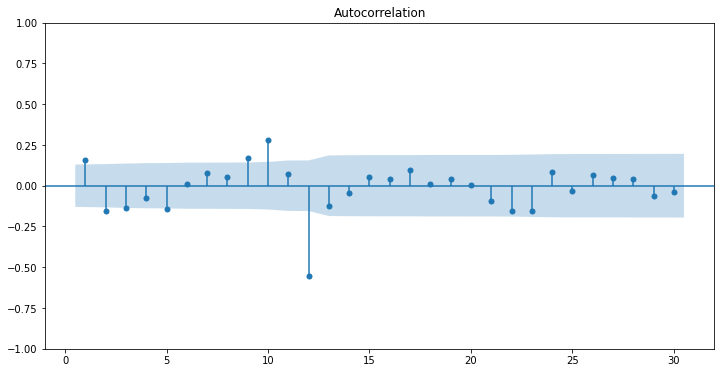

In [17]:
#plot_acf(serie, zero=False, lags=30);
plot_acf(inflacion_usa['inflacion_diff'].dropna(),zero=False, lags=30);

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


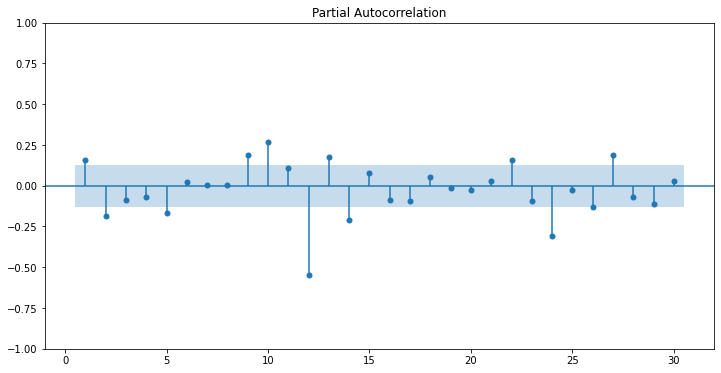

In [18]:
# autocorrelación parcial PACF
plot_pacf(inflacion_usa['inflacion_diff'].dropna(), zero=False, lags=30);

In [19]:
# plot_pacf(serie, zero = False,  lags=20);
plot_pcaf

NameError: ignored

Comentarios

In [27]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(inflacion_usa['inflacion_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, f

AR: 0, MA: 3
AR: 0, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, f

AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, f

AR: 1, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 0
AR: 2, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, f

AR: 2, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

AR: 2, MA: 3
AR: 2, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 3, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 3, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

AR: 3, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 4, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

AR: 4, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0   452.246376  459.105067
   1   446.295195  456.583232
   2   445.143542  458.860925
   3   440.267575  457.414304
   4   442.262910  462.838984
1  0   448.648464  458.936501
   1   447.167560  460.884943
   2   441.789790  458.936518
   3   442.245054  462.821128
   4   444.152306  468.157726
2  0   442.625754  456.343137
   1   440.161969  457.308697
   2   427.888703  448.464777
   3   442.814480  466.819899
   4   441.234734  468.669499
3  0   442.883696  460.030424
   1   442.149836  462.725910
   2   444.111525  468.116944
   3   416.706834  444.141599
   4   410.062419  440.926530
4  0   443.676556  464.252629
   1   443.326656  467.332076
   2   446.103462  473.538227
   3   436.578816  467.442927
   4   397.817875  432.111332

vamos a elegir el modelo que tiene "mejor" c riterio de Akaike (AIC). el valor más pequeño

In [28]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
4  4   397.817875  432.111332
3  4   410.062419  440.926530
   3   416.706834  444.141599
2  2   427.888703  448.464777
4  3   436.578816  467.442927
2  1   440.161969  457.308697
0  3   440.267575  457.414304
2  4   441.234734  468.669499
1  2   441.789790  458.936518
3  1   442.149836  462.725910
1  3   442.245054  462.821128
0  4   442.262910  462.838984
2  0   442.625754  456.343137
   3   442.814480  466.819899
3  0   442.883696  460.030424
4  1   443.326656  467.332076
   0   443.676556  464.252629
3  2   444.111525  468.116944
1  4   444.152306  468.157726
0  2   445.143542  458.860925
4  2   446.103462  473.538227
0  1   446.295195  456.583232
1  1   447.167560  460.884943
   0   448.648464  458.936501
0  0   452.246376  459.105067

El criterio de Akaike (AIC) y el criterio bayesiano de información (BIC) nos sirve para elegir el modelo adecuado. 
Elegir solo uno, BIC o AIC.


Ente mas grande es el AIC/BIC es un peor modelo.

de acuerdo con el criterio 

el mejor modelo segun AIC es ARMA(4,4)

el modelo  estimar AR(2)

In [29]:
modelo1 = ARIMA(inflacion_usa['inflacion_diff'].dropna(), order=(4, 0, 4)) ##AR(2)
resultado1 = modelo1.fit() # calcula
print(resultado1.summary() )  #muestra

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         inflacion_diff   No. Observations:                  228
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -188.909
Date:                Tue, 07 Mar 2023   AIC                            397.818
Time:                        14:05:45   BIC                            432.111
Sample:                             0   HQIC                           411.654
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.040      0.457      0.647      -0.060       0.096
ar.L1          0.7979      0.056     14.365      0.000       0.689       0.907
ar.L2         -0.5685      0.092     -6.169      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
##realizamos pronóstico
inflacion_usa['inflacion_diff_pronosticada'] = resultado1.predict()


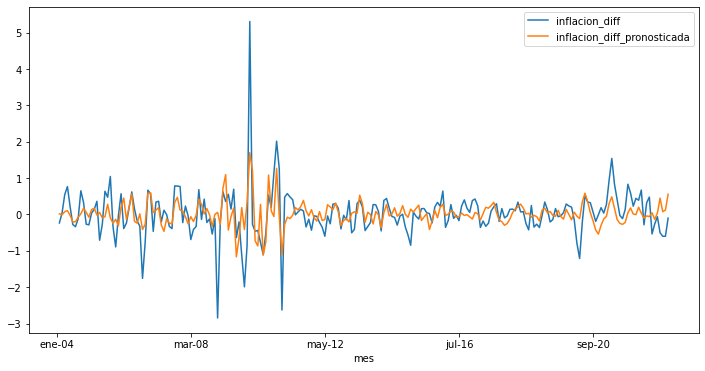

In [32]:
inflacion_usa[['inflacion_diff', 'inflacion_diff_pronosticada']].plot();

In [33]:
modelo2 = ARIMA(inflacion_usa['inflacion_usa'], order=(4, 1, 4)) ##ARIMA(4,1,4)
resultado2 = modelo2.fit() # calcula
print(resultado2.summary() )  #muestra

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          inflacion_usa   No. Observations:                  229
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -189.096
Date:                Tue, 07 Mar 2023   AIC                            396.192
Time:                        14:23:05   BIC                            427.056
Sample:                             0   HQIC                           408.644
                                - 229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7973      0.056     14.221      0.000       0.687       0.907
ar.L2         -0.5669      0.093     -6.125      0.000      -0.748      -0.386
ar.L3          0.5847      0.090      6.467      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
#realizamos pronostico
inflacion_usa['inflacion_pronosticada']=resultado2.predict()

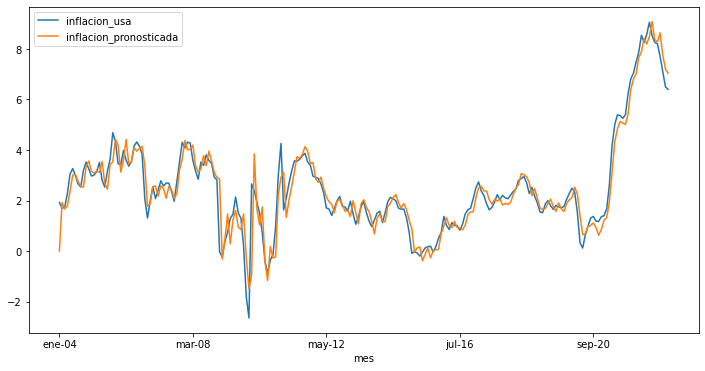

In [37]:
inflacion_usa[['inflacion_usa','inflacion_pronosticada']].plot();

In [36]:
inflacion_usa.describe()

,inflacion_usa,inflacion_diff,inflacion_diff_pronosticada,inflacion_pronosticada
count,229.000000,228.000000,228.000000,229.000000
mean,2.506888,0.019622,0.020633,2.479338
std,1.902673,0.648078,0.328533,1.888224
min,-2.649237,-2.845069,-1.163017,-1.483494
25%,1.473896,-0.268544,-0.126499,1.438088
50%,2.127112,0.001298,0.014372,2.077494
75%,3.255562,0.304898,0.162788,3.162773
max,9.059758,5.305575,1.698408,9.088433


In [38]:
resultado2.predict(229, 232)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


229    6.481743
230    6.346643
231    6.341729
232    5.904269
Name: predicted_mean, dtype: float64

El modelo pronostica que para febrero la inflacion en Estados Unidos sera 6.3466%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
pd.read_csv('/MXN=X.csv')

,Date,tipo_cambio
0,6/21/22,20.268499
1,6/22/22,20.136999
2,6/23/22,20.049500
3,6/24/22,20.009899
4,6/27/22,19.892559
...,...,...
181,3/1/23,18.300940
182,3/2/23,18.115971
183,3/3/23,18.105301
184,3/6/23,17.978001
